Importe das bibliotecas e análise inicial do dataframe

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\021042631\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
df_kaggle = pd.read_csv('data_source/imdb-spider-man-reviews.csv')
df_kaggle.shape

(21228, 7)

In [84]:
df_kaggle.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse


In [85]:
df_kaggle.isnull().sum()

Rating          1162
Title              0
Date               0
Helpful_Vote       0
Total_Vote         0
Review             0
Movie              0
dtype: int64

In [86]:
df_kaggle.dtypes

Rating          float64
Title            object
Date             object
Helpful_Vote      int64
Total_Vote        int64
Review           object
Movie            object
dtype: object

In [87]:
df_reviews = df_kaggle.copy()
df_reviews = df_reviews.dropna(subset=['Rating'])
df_reviews.shape
#  (21228, 7)

(20066, 7)

In [88]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse


Inicio da Análise de sentimentos com biblioteca Vader

In [89]:
# Intancia
analyser = SentimentIntensityAnalyzer()

In [90]:
# funcao para processamento da analise

def compound_analysis(text):
    df_analyzed = analyser.polarity_scores(text)['compound']
    return df_analyzed

In [91]:
# executando o processamento

df_reviews['compound_analysis'] = df_reviews['Review'].apply(compound_analysis)
df_reviews.shape

(20066, 8)

In [92]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709


In [93]:
#  -1 = muito negativa +1 / +1 = review muito positiva
df_reviews['compound_analysis']

0       -0.4515
1        0.9866
2        0.9727
3        0.7615
4        0.9709
          ...  
21223    0.9499
21224    0.9985
21225    0.9042
21226    0.9077
21227    0.9957
Name: compound_analysis, Length: 20066, dtype: float64

Analise da coluna de Rating e conversão para intervalos de -1 a 1

In [94]:
df_reviews['Rating'].unique()

array([10.,  8.,  7.,  6.,  9.,  5.,  2.,  4.,  1.,  3.])

In [95]:
print(type (df_reviews['Rating'][0]))

<class 'numpy.float64'>


In [96]:
print(type (df_reviews['compound_analysis'][0]))

<class 'numpy.float64'>


In [97]:
def convert_to_minus_one_plus_one(x):
    if x == 1:
        return -1
    elif x == 10:
        return 1
    else:
        return round((x - 5) / 4.5, 4)

In [98]:
df_reviews['convert_Rating'] = df_reviews['Rating'].apply(convert_to_minus_one_plus_one)
df_reviews.shape

(20066, 9)

In [99]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000


In [100]:
df_reviews2 = df_reviews[df_reviews.Rating <= 3]
df_reviews2.head(4)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
43,2.0,Overrated & Tedious!,20 February 2019,27,50,Contains light spoilers! 8.7 on Imdb? Are you ...,Spider-Man: Into the Spider-Verse,0.8159,-0.6667
53,2.0,Not really feeling it,2 June 2019,25,46,I'm sure it's terribly clever and artsy. I cou...,Spider-Man: Into the Spider-Verse,0.9653,-0.6667
65,1.0,An Honest Review,29 December 2018,82,235,"I'll be upfront, I'm giving this 1 star becaus...",Spider-Man: Into the Spider-Verse,0.9252,-1.0000
85,2.0,Meh. The dvd version is annoyingly half in 3D.,27 March 2019,9,15,Why? They should have corrected the DVD versio...,Spider-Man: Into the Spider-Verse,0.0000,-0.6667


Definindo valores categoricos positivo, negativo, neutro e medindo a acurácia

vamos atribuir 3 niveis de sentimento: positivo, negativo, neutro
Na coluna compound_analysis e convert_Rating, esta será a gradação:

-1 <= value < -0,1: negativo

-0,1 <= value < +0,3: neutro

+0,3 <= value <= +1: positivo

In [101]:
# converter compound em sentimento
def categorical_sentiment(compound_analysis):
    if compound_analysis > 0.3:
        return 'positive'
    elif compound_analysis < -0.1:
        return 'negative'
    else:  
        return 'neutral'

In [102]:
df_reviews.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0


In [103]:
df_reviews['compound_sentiment'] = df_reviews['compound_analysis'].apply(categorical_sentiment)
df_reviews.shape

(20066, 10)

In [104]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive


Converter coluna 'convert_Rating' em sentimento categórico

In [105]:
df_reviews['rating_sentiment'] = df_reviews['convert_Rating'].apply(categorical_sentiment)
df_reviews.shape

(20066, 11)

In [106]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive,positive
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive,positive
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive,positive


Cálculo da Acurácia: comparar as classificações categóricas entre o rating oficial IMDB e o sentimento calculado

In [126]:
accuracy = accuracy_score(df_reviews['rating_sentiment'], df_reviews['compound_sentiment'])
print('A acurácia do modelo foi de: ', round(accuracy, 2))

A acurácia do modelo foi de:  0.73


Análise Gráfica: Comparativo rating_sentiment x compound_sentiment

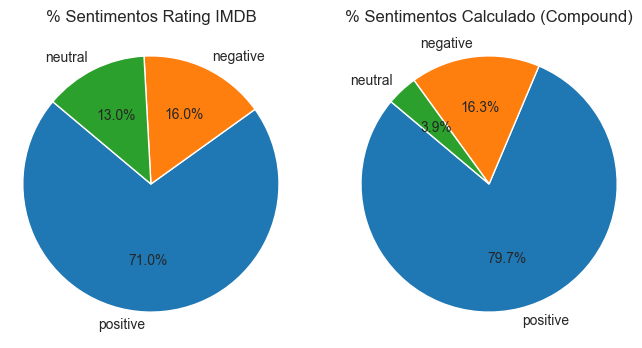

In [108]:
rating_sentiment_counts = df_reviews['rating_sentiment'].value_counts()
compound_sentiment_counts = df_reviews['compound_sentiment'].value_counts()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie(rating_sentiment_counts, labels=rating_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Rating IMDB')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(compound_sentiment_counts, labels=compound_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Calculado (Compound)')
plt.axis('equal')

plt.show()

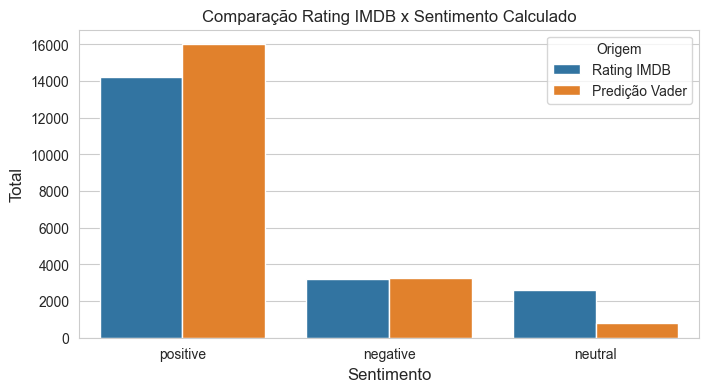

In [109]:
sentiment_counts_df = pd.DataFrame({
    'Sentimento': ['positive', 'negative', 'neutral'],
    'Rating IMDB': df_reviews['rating_sentiment'].value_counts(),
    'Predição Vader': df_reviews['compound_sentiment'].value_counts()
}).fillna(0)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='Sentimento', y='value', hue='variable', data=pd.melt(sentiment_counts_df, ['Sentimento']))

plt.title('Comparação Rating IMDB x Sentimento Calculado', fontsize=12)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Origem', fontsize=10)

plt.show()

Gráficos de Nuvem de Palavras

In [117]:
df_reviews.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0,negative,positive


In [119]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\021042631\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [124]:
def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stopwords_en]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

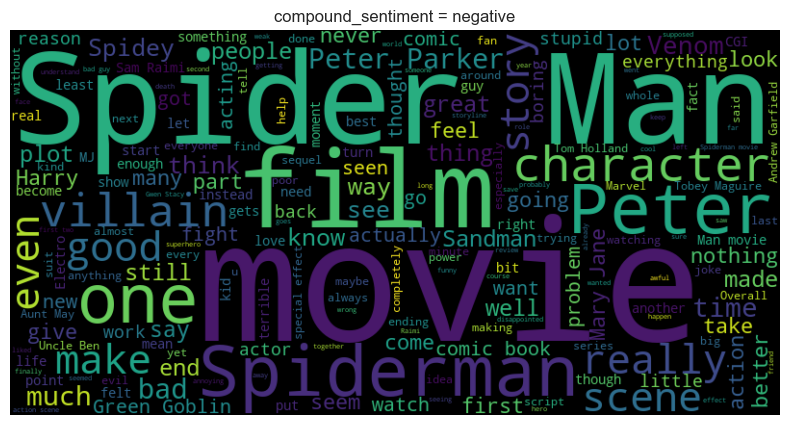

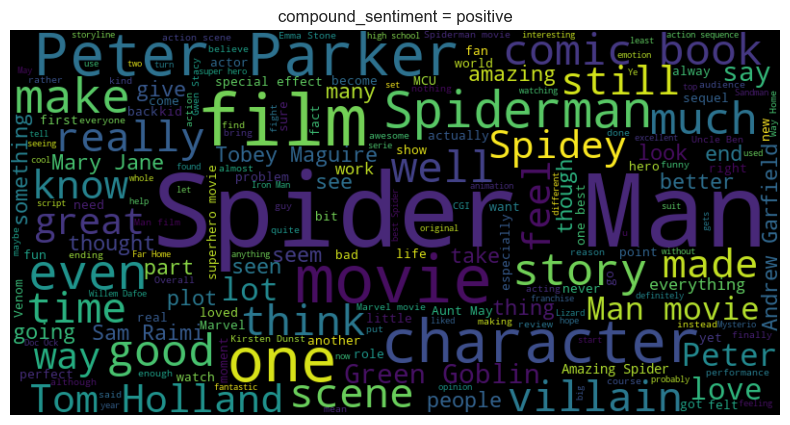

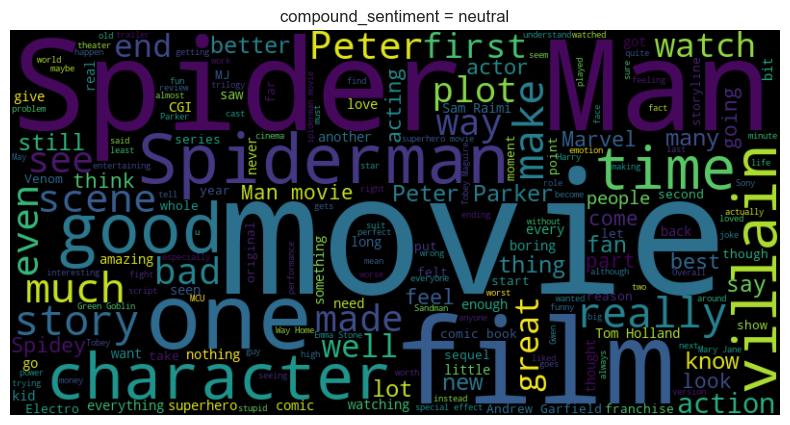

In [125]:
# Gerar um gráfico para cada tipo: positive, negative e neutral

for sentiment_value in df_reviews['compound_sentiment'].unique():

    filtered_df = df_reviews[df_reviews['compound_sentiment'] == sentiment_value]
    
    text_reviews = ' '.join(filtered_df['Review'])

    cleaned_reviews = remove_stopwords(text_reviews)
    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(cleaned_reviews)  


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'compound_sentiment = {sentiment_value}')
    plt.axis('off')
    plt.show()

Gerando colunas para 'pos', 'neg', 'neu' usando o Vader lib:

In [110]:
df_reviews_new = df_reviews.copy()
df_reviews_new.shape

(20066, 11)

In [111]:
df_reviews_new.head(2)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive


In [112]:
def analyze_sentiment(text, type):
    """
    text (str): O texto a ser analisado.
    type (str): O tipo do sentimento desejado ('pos', 'neg' ou 'neu').
    """
    df_analyzed = analyser.polarity_scores(text)
    
    return df_analyzed[type]

In [113]:
df_reviews_new['pos_analysis'] = df_reviews_new['Review'].apply(lambda text: analyze_sentiment(text, 'pos'))
df_reviews_new.shape

(20066, 12)

In [114]:
df_reviews_new['neg_analysis'] = df_reviews_new['Review'].apply(lambda text: analyze_sentiment(text, 'neg'))
df_reviews_new.shape

(20066, 13)

In [115]:
df_reviews_new['neu_analysis'] = df_reviews_new['Review'].apply(lambda text: analyze_sentiment(text, 'neu'))
df_reviews_new.shape

(20066, 14)

In [116]:
df_reviews_new.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment,pos_analysis,neg_analysis,neu_analysis
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive,0.134,0.126,0.740
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive,0.143,0.013,0.845
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive,positive,0.308,0.063,0.629
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive,positive,0.148,0.083,0.769
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive,positive,0.145,0.018,0.837
